In [1871]:
(288 * 288 * 5) / 1024

405.0

In [2]:
import os
for path, dirs, __ in os.walk("img"):
    print(path, dirs, len(dirs))

img ['1'] 1
img\1 ['1', '1aa', '1ab', '1b', '1c', '1d', '1e', '1f', '1h', '1i', '1j', '1k', '1l', '1n', '1o', '1p', '1q', '1r'] 18
img\1\1 [] 0
img\1\1aa [] 0
img\1\1ab [] 0
img\1\1b [] 0
img\1\1c [] 0
img\1\1d [] 0
img\1\1e [] 0
img\1\1f [] 0
img\1\1h [] 0
img\1\1i [] 0
img\1\1j [] 0
img\1\1k [] 0
img\1\1l [] 0
img\1\1n [] 0
img\1\1o [] 0
img\1\1p [] 0
img\1\1q [] 0
img\1\1r [] 0


In [1872]:
from PIL import Image
import numpy as np

In [1873]:
with Image.open("313.205.png") as im:
    # print(np.array(im.convert('RGBA')).shape)
    # print(im.getcolors())
    # print(im.size)
    # print(im.getpalette())
    # print(im.convert('L').getpalette())
    # print(im.getcolors())
    # palette = im.getpalette()
    # if palette is None:
    #     print("No palette")
    #     imcolors = im.getcolors()
    #     palette = [c[1][:3] for c in imcolors if c[1][3] == 255]
    #     counts = [c[0] for c in imcolors if c[1][3] == 255]
    #     lp = len(palette)
    # else:
    #     counts = [c[0] for c in im.getcolors()]
    #     lp = len(palette) // 3
    im = im.convert('RGBA')
    imcolors = im.getcolors()
    palette = [c[1][:3] for c in imcolors if c[1][3] > 200]
    counts = [c[0] for c in imcolors if c[1][3] > 200]
    lp = len(palette)
print(lp)
print(palette)
print(counts)

17
[(189, 49, 24), (156, 123, 41), (131, 115, 115), (92, 183, 232), (77, 67, 67), (65, 57, 57), (41, 39, 39), (20, 135, 197), (12, 65, 94), (232, 140, 123), (222, 180, 49), (172, 164, 156), (133, 30, 12), (98, 90, 98), (82, 74, 74), (32, 32, 41), (16, 16, 16)]
[189, 144, 3744, 414, 2106, 2160, 3501, 513, 441, 36, 2160, 3816, 117, 3060, 1098, 180, 2034]


In [1874]:
all_colors = np.array(palette).reshape([lp, 3])

In [1875]:
base_colors = all_colors.astype(float)
# rad = np.linalg.norm(base_colors, axis = 1)
# rad[rad == 0] = 1
# colors = base_colors / rad[:, np.newaxis]
# colors

# Don't Need

In [1876]:
# from sklearn import cluster

In [1877]:
# c = cluster.AgglomerativeClustering(
#     n_clusters = None,
#     distance_threshold = 0.015,
#     metric = 'cosine',
#     linkage = 'single'
# )

In [1878]:
# c.fit_predict(colors)

In [1879]:
# pred = c.fit_predict(colors)
# l = [list() for _ in range(np.max(pred) + 1)]
# for i, p in enumerate(pred):
#     l[p].append(base_colors[i])
# l

# The Good Stuff

In [1880]:
h_base_colors = base_colors / 255
Cmax = np.max(h_base_colors, axis = 1)
Cmin = np.min(h_base_colors, axis = 1)
Cargmax = np.argmax(h_base_colors, axis = 1)
d = Cmax - Cmin
d

array([0.64705882, 0.45098039, 0.0627451 , 0.54901961, 0.03921569,
       0.03137255, 0.00784314, 0.69411765, 0.32156863, 0.42745098,
       0.67843137, 0.0627451 , 0.4745098 , 0.03137255, 0.03137255,
       0.03529412, 0.        ])

In [1881]:
hues = np.zeros_like(d)
is_R = (d > 0) * (Cargmax == 0)
is_G = (d > 0) * (Cargmax == 1)
is_B = (d > 0) * (Cargmax == 2)
hues[is_R] = np.fmod((h_base_colors[is_R, 1] - h_base_colors[is_R, 2]) / d[is_R], 6)
hues[is_G] = ((h_base_colors[is_G, 2] - h_base_colors[is_G, 0]) / d[is_G] + 2)
hues[is_B] = ((h_base_colors[is_B, 0] - h_base_colors[is_B, 1]) / d[is_B] + 4)
hues

array([ 0.15151515,  0.71304348,  0.        ,  3.35      ,  0.        ,
        0.        ,  0.        ,  3.35028249,  3.35365854,  0.1559633 ,
        0.75722543,  0.5       ,  0.14876033, -1.        ,  0.        ,
        4.        ,  0.        ])

In [1882]:
sat = np.zeros_like(hues)
sat[Cmax > 0] = (d[Cmax > 0] / Cmax[Cmax > 0])
sat

array([0.87301587, 0.73717949, 0.1221374 , 0.60344828, 0.12987013,
       0.12307692, 0.04878049, 0.89847716, 0.87234043, 0.46982759,
       0.77927928, 0.09302326, 0.90977444, 0.08163265, 0.09756098,
       0.2195122 , 0.        ])

In [1883]:
import matplotlib.pyplot as plt

In [1884]:
# len(counts), x.shape

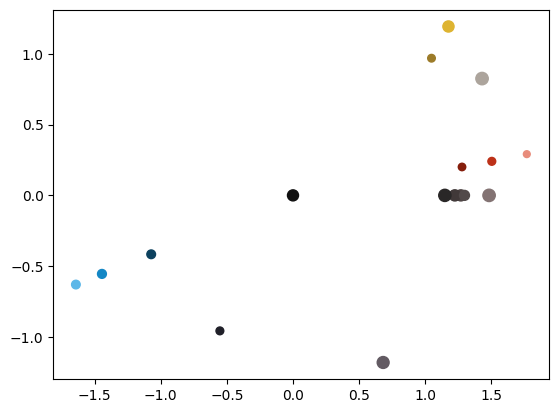

In [1885]:
angle = hues * 3.14159 / 3
x = np.cos(angle) * (Cmax + 1 - sat / 4)
y = np.sin(angle) * (Cmax + 1 - sat / 4)
x[d == 0] = 0
plt.scatter(x, y, np.sqrt(counts) + 18, c = h_base_colors)

In [1886]:
from sklearn import cluster

In [1887]:
c = cluster.AgglomerativeClustering(
    n_clusters = None,
    distance_threshold = 0.7,
    linkage = 'average'
)

In [1888]:
groups = c.fit_predict(np.concatenate([x[:,np.newaxis], y[:,np.newaxis]], axis = 1))

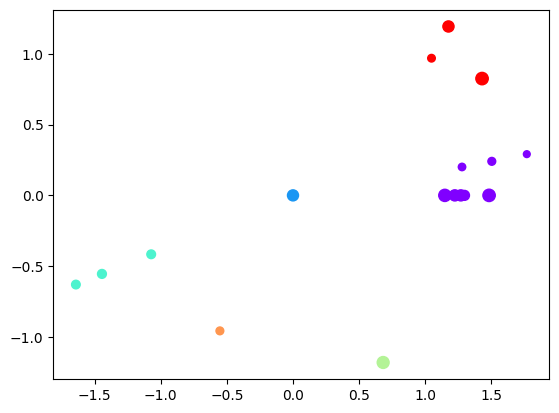

In [1889]:
plt.scatter(x, y, np.sqrt(counts) + 18, c = groups, cmap = 'rainbow')

## 64 colors:

0: Transparent

1-10: Shades of black

11-26: Color 1

27-35: Color 2

36-42: Color 3

43-48: Color 4

49-54: Color 5

55-57: Color 6

58-60: Color 7

61: Color 8

62: Color 9

63: Color 10

In [1890]:
def make_overlay_colors(_hue, _sat, n_shades):
    for l in range(n_shades):
        _light = 0.1 + 0.8 * l / n_shades
        if n_shades == 1:
            _light = 0.5
        _c = (1 - abs(2 * _light - 1)) * _sat
        _x = _c * (1 - abs((_hue / 60) % 2 - 1))
        _m = _light - _c / 2
        _C = int((_c + _m) * 255)
        _X = int((_x + _m) * 255)
        _m = int(_m * 255)
        if _hue < 60:
            yield _C, _X, _m, 255
        elif _hue < 120:
            yield _X, _C, _m, 255
        elif _hue < 180:
            yield _m, _C, _X, 255
        elif _hue < 240:
            yield _m, _X, _C, 255
        elif _hue < 300:
            yield _X, _m, _C, 255
        else:
            yield _C, _m, _X, 255

In [1891]:
overlay_keys = [
    (0  , 0.00, 10),
    (45 , 0.5, 16),
    (180, 0.6, 9),
    (315, 0.7, 7),
    (90 , 0.8, 6),
    (225, 0.8, 6),
    (135, 0.9, 3),
    (270, 0.9, 3),
    (90 , 1.0, 3)
]

In [1892]:
groups

array([0, 5, 0, 2, 0, 0, 0, 2, 2, 0, 5, 5, 0, 3, 0, 4, 1], dtype=int64)

In [1893]:
rev_groups = [[] for _ in range(max(groups) + 1)]
for g, col in zip(groups, base_colors):
    rev_groups[g].append(col.astype(int))
rev_groups.sort(key = len)
singles = []
for i, group in enumerate(rev_groups):
    if len(group) > 1:
        break
    singles.extend(rev_groups[0])
rev_groups = [singles] + rev_groups[i:]
rev_groups.sort(key = len)
rev_groups

[[array([16, 16, 16]), array([16, 16, 16]), array([16, 16, 16])],
 [array([ 92, 183, 232]), array([ 20, 135, 197]), array([12, 65, 94])],
 [array([156, 123,  41]), array([222, 180,  49]), array([172, 164, 156])],
 [array([189,  49,  24]),
  array([131, 115, 115]),
  array([77, 67, 67]),
  array([65, 57, 57]),
  array([41, 39, 39]),
  array([232, 140, 123]),
  array([133,  30,  12]),
  array([82, 74, 74])]]

In [1894]:
def replace_color(old_data, new_data, old_color, new_color):
    dcol = np.abs(old_data[:,:,:3] - old_color)
    valid = (dcol.sum(axis = 2) < 3) * (old_data[:,:,3] > 200)
    new_data[valid] = new_color

In [1895]:
data = np.array(im)
data2 = np.array(im)
for group in rev_groups:
    group = sorted(group, key = np.sum)
    print(group)
    if any(col.max() == col.min() for col in group):
        for n, o in zip(make_overlay_colors(*overlay_keys[0]), group):
            replace_color(data, data2, np.array(o), n)
        continue
    while overlay_keys[-1][2] < len(group):
        del overlay_keys[-1]
        if len(overlay_keys) == 1:
            raise IndexError
    for n, o in zip(make_overlay_colors(*overlay_keys[-1]), group):
        replace_color(data, data2, np.array(o), n)
    del overlay_keys[-1]

[array([16, 16, 16]), array([16, 16, 16]), array([16, 16, 16])]
[array([12, 65, 94]), array([ 20, 135, 197]), array([ 92, 183, 232])]
[array([156, 123,  41]), array([222, 180,  49]), array([172, 164, 156])]
[array([41, 39, 39]), array([133,  30,  12]), array([65, 57, 57]), array([77, 67, 67]), array([82, 74, 74]), array([189,  49,  24]), array([131, 115, 115]), array([232, 140, 123])]


In [1896]:
im2 = Image.fromarray(data2)
im2.show()

Modest Docile
Modest Bashful
Modest Mild
Jolly Naive
Serious Adamant
Serious Hardy
Serious Bold
Calm Lax
Calm Relaxed
Calm Careful
Timid Bashful
Timid Lonely
Gentle Careful
Adamant Rash
Lax Relaxed
Lax Hasty
Lax Quirky
Timid Quiet
Bashful Careful
Brave Adamant
Brave Bold
Brave Naive
Hasty Rash
Hasty Timid
Quiet Mild
Quiet Careful
Quiet Lonely
Lonely Quirky
Mild Hardy
Mild Docile
Impish Jolly
Impish Naughty
Impish Quirky
Naughty Naive
Naive Docile
Hardy Bold
Relaxed Gentle
Bold Impish
Jolly Gentle
Rash Naughty
Sassy Naughty
Sassy Adamant
Sassy Relaxed